# Useful librairies

In [184]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date, timedelta

matplotlib.rcParams["figure.facecolor"] = "white"
pd.set_option('display.max_columns', None)

# EDA

## Data Overview

In [185]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


In [186]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [187]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [188]:
df.head()


,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


In [189]:
#drop second
df.drop(['Second'], axis=1, inplace=True)

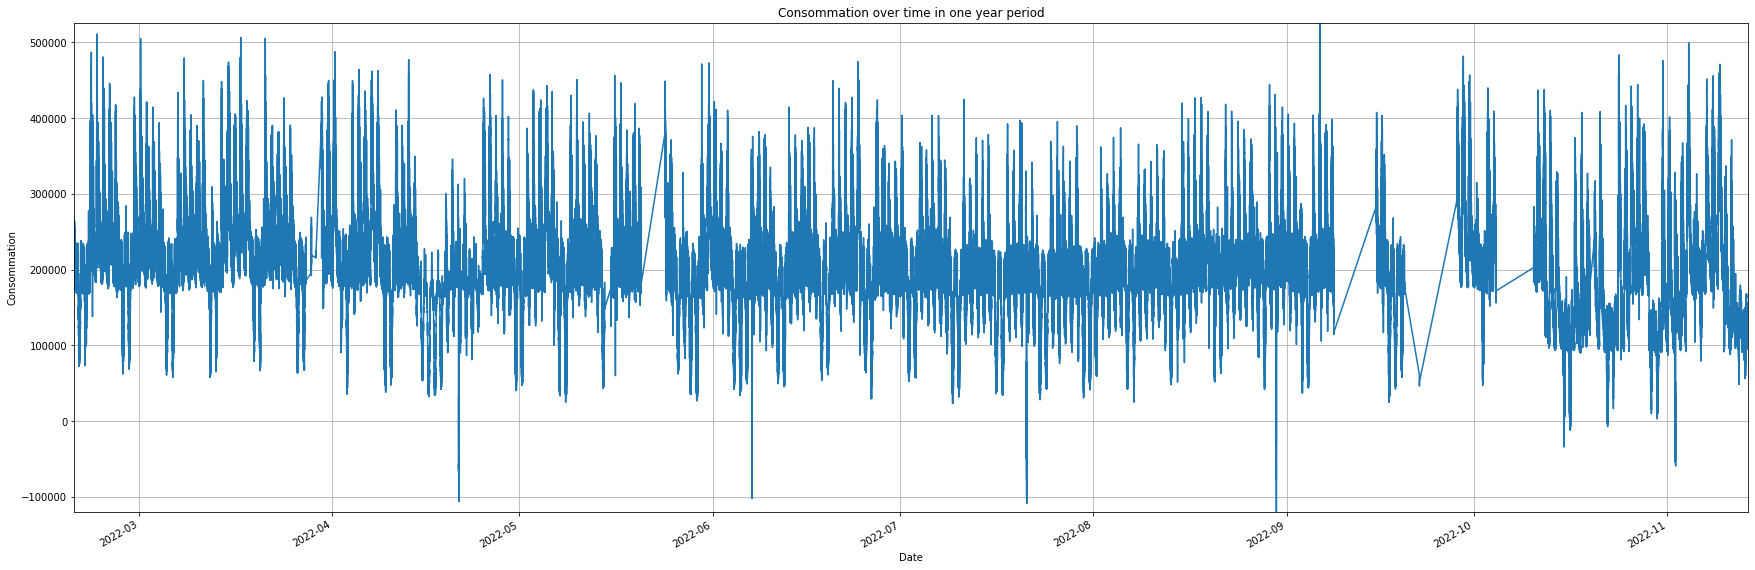

In [190]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

## Replacing missing data

### Days Missing

In [191]:
sdate = date(2022,2,19) 
edate = date(2022,11,13)
all_days = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")

In [192]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)


In [193]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We have ", missing_perc, "% of complete days missing values.")

We have  7.87 % of complete days missing values.


In [194]:
for miss_day in days_missing:
    prev_week = miss_day - dt.timedelta(days=7)
    next_week = miss_day + dt.timedelta(days=7)
    prev_2_week = miss_day - dt.timedelta(days=14)
    next_2_week = miss_day + dt.timedelta(days=14)
    if df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)].shape[0] != 0:
        df_concat = df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (
            df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)].shape[0]
            != 0
        ):
            df_concat = df.loc[
                (df.Month == next_week.month) & (df.Day == next_week.day)
            ]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=7)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (
                df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ].shape[0]
                != 0
            ):
                df_concat = df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (
                    df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ].shape[0]
                    != 0
                ):
                    df_concat = df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=14)
                    df = pd.concat([df, df_concat], ignore_index=True)


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\298559384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\298559384.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\298559384.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [195]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [196]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)


In [197]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We now have", missing_perc, "% of complete days missing values.")

We now have 0.0 % of complete days missing values.


In [198]:
#sort
df.sort_values(by='Date', inplace=True)

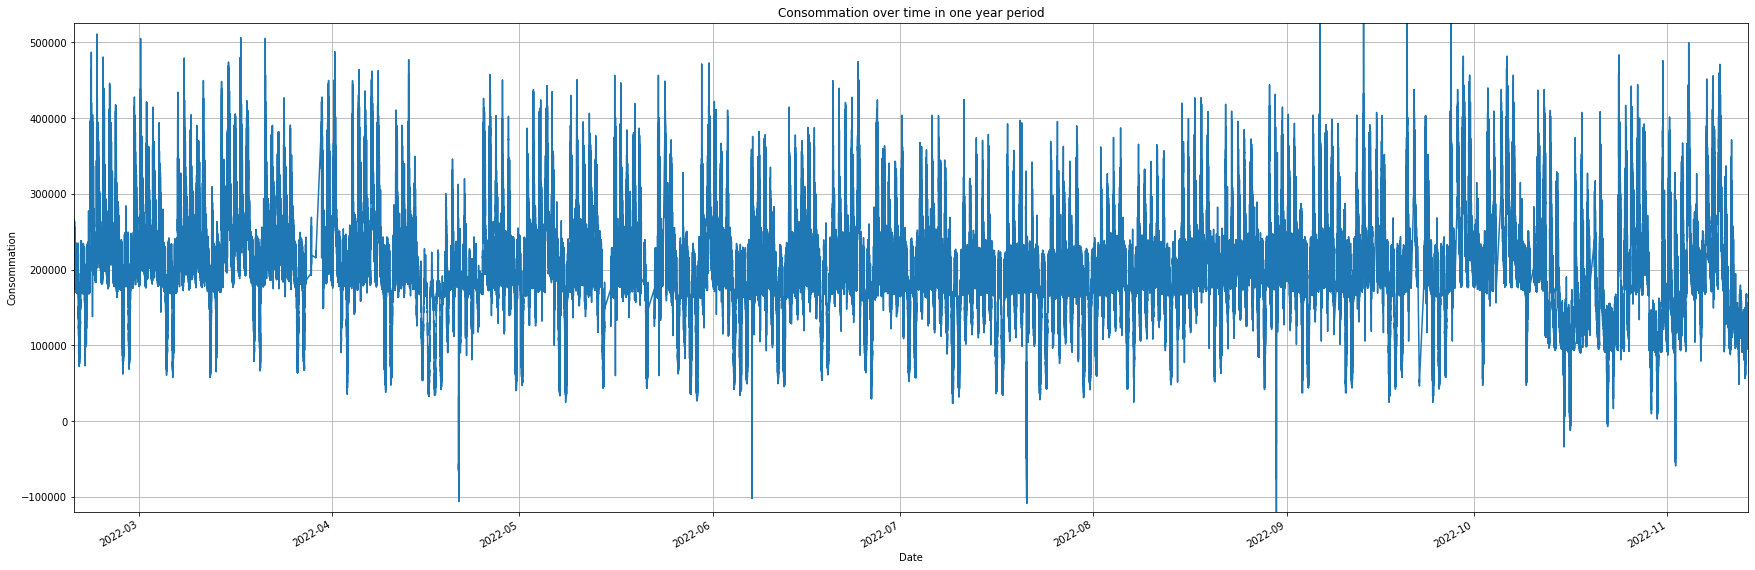

In [199]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

### Hours Missing

In [200]:
hours = range(0, 23)

In [201]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[0] == 0:
            hours_missing.append([x, hour])


In [202]:
missing_perc = round((len(hours_missing)*100)/(len(all_days)*24), 2)
print("We have ", missing_perc, "% of complete hours missing values.")

We have  3.36 % of complete hours missing values.


In [203]:
for miss_value in hours_missing:
    prev_hour = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(hours = -1)
    next_hour = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(hours = 1)
    prev2_hours = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(hours = -2)
    next2_hours = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(hours = 2)
    if (df.loc[(df.Month == prev_hour.month) & (df.Day == prev_hour.day) & (df.Hour == prev_hour.hour)].shape[0] != 0) :
        df_concat = df.loc[(df.Month == prev_hour.month) & (df.Day == prev_hour.day) & (df.Hour == prev_hour.hour)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours = 1)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (df.loc[(df.Month == next_hour.month) & (df.Day == next_hour.day) & (df.Hour == next_hour.hour)].shape[0] != 0) :
            df_concat = df.loc[(df.Month == next_hour.month) & (df.Day == next_hour.day) & (df.Hour == next_hour.hour)]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours = 1)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (df.loc[(df.Month == prev2_hours.month) & (df.Day == prev2_hours.day) & (df.Hour == prev2_hours.hour)].shape[0] != 0) :
                df_concat = df.loc[(df.Month == prev2_hours.month) & (df.Day == prev2_hours.day) & (df.Hour == prev2_hours.hour)]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours = 2)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (df.loc[(df.Month == next2_hours.month) & (df.Day == next2_hours.day) & (df.Hour == next2_hours.hour)].shape[0] != 0) :
                    df_concat = df.loc[(df.Month == next2_hours.month) & (df.Day == next2_hours.day) & (df.Hour == next2_hours.hour)]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours = 2)
                    df = pd.concat([df, df_concat], ignore_index=True)


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\256637571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours = 1)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\256637571.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours = 2)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_12060\256637571.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [204]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [205]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[0] == 0:
            hours_missing.append([x, hour])


In [206]:
missing_perc = round((len(hours_missing)*100)/(len(all_days)*24), 2)
print("We now have ", missing_perc, "% of complete hours missing values.")

We now have  1.89 % of complete hours missing values.


In [207]:
df.sort_values(by='Date', inplace=True)

### Missing minutes

Runtime too long after testing

In [208]:
# minutes = range(0, 59)
# minutes_missing = []
# for x in all_days:
#     month_x = x.month
#     day_x = x.day
#     for hour in hours:
#         for minute in minutes:
#             if df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour) & (df.Minute == minute)].shape[0] == 0:
#                 minutes_missing.append([x, hour, minute])
# missing_perc = round((len(minutes_missing)*100)/(len(all_days)*24*60), 2)
# print("We have ", missing_perc, "% of complete minutes missing values.")
# for miss_value in minutes_missing:
#     prev_minute = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(minutes = miss_value[2]) + dt.timedelta(minutes = -1)
#     next_minute = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(minutes = miss_value[2]) + dt.timedelta(minutes = 1)
#     prev2_minutes = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(minutes = miss_value[2]) + dt.timedelta(minutes = -2)
#     next2_minutes = miss_value[0] + dt.timedelta(hours = miss_value[1]) + dt.timedelta(minutes = miss_value[2]) + dt.timedelta(minutes = 2)
#     if (df.loc[(df.Month == prev_minute.month) & (df.Day == prev_minute.day) & (df.Hour == prev_minute.hour) & (df.Minute == prev_minute.minute)].shape[0] != 0) :
#         df_concat = df.loc[(df.Month == prev_minute.month) & (df.Day == prev_minute.day) & (df.Hour == prev_minute.hour) & (df.Minute == prev_minute.minute)]
#         df_concat["Date"] = df_concat["Date"] + dt.timedelta(minutes = 1)
#         df = pd.concat([df, df_concat], ignore_index=True)
#     else:
#         if (df.loc[(df.Month == next_minute.month) & (df.Day == next_minute.day) & (df.Hour == next_minute.hour) & (df.Minute == next_minute.minute)].shape[0] != 0) :
#             df_concat = df.loc[(df.Month == next_minute.month) & (df.Day == next_minute.day) & (df.Hour == next_minute.hour) & (df.Minute == next_minute.minute)]
#             df_concat["Date"] = df_concat["Date"] - dt.timedelta(minutes = 1)
#             df = pd.concat([df, df_concat], ignore_index=True)
#         else:
#             if (df.loc[(df.Month == prev2_minutes.month) & (df.Day == prev2_minutes.day) & (df.Hour == prev2_minutes.hour) & (df.Minute == prev2_minutes.minute)].shape[0] != 0) :
#                 df_concat = df.loc[(df.Month == prev2_minutes.month) & (df.Day == prev2_minutes.day) & (df.Hour == prev2_minutes.hour) & (df.Minute == prev2_minutes.minute)]
#                 df_concat["Date"] = df_concat["Date"] + dt.timedelta(minutes = 2)
#                 df = pd.concat([df, df_concat], ignore_index=True)
#             else:
#                 if (df.loc[(df.Month == next2_minutes.month) & (df.Day == next2_minutes.day) & (df.Hour == next2_minutes.hour) & (df.Minute == next2_minutes.minute)].shape[0] != 0) :
#                     df_concat = df.loc[(df.Month == next2_minutes.month) & (df.Day == next2_minutes.day) & (df.Hour == next2_minutes.hour) & (df.Minute == next2_minutes.minute)]
#                     df_concat["Date"] = df_concat["Date"] - dt.timedelta(minutes = 2)
#                     df = pd.concat([df, df_concat], ignore_index=True)
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
# df['Hour'] = df['Date'].dt.hour
# df['Minute'] = df['Date'].dt.minute
# df['Second'] = df['Date'].dt.second
# missing_perc = round((len(hours_missing)*100)/(len(all_days)*24), 2)
# print("We now have ", missing_perc, "% of complete hours missing values.")
# df.sort_values(by='Date', inplace=True)

## Adding Irradiance Data

In [209]:
df_irr = pd.read_csv('radiation_data.csv', sep=';')
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr['Date'] = pd.to_datetime(df_irr['Date'], format='%Y%m%d%H%M')
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [210]:
df_nan= df_irr[df_irr['Irradiance']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_irr.loc[df_nan_index, 'Irradiance'] = np.nan

In [211]:
df_irr.head()
#df_irr['Irradiance'] = df_irr['Irradiance'].astype(float)

#add between each data the missing values for the minute
df_irr = df_irr.set_index('Date')
df_irr = df_irr.resample('1min').asfreq()
df_irr = df_irr.reset_index()

# convert Irradiance to float
df_irr['Irradiance'] = df_irr['Irradiance'].str.replace(',', '.').astype(float)
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0.0
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [212]:
# for the nan values we will use the first value before the nan value that is not nan
df_irr['Irradiance'] = df_irr['Irradiance'].fillna(method='ffill')

In [213]:
df_irr = df_irr[(df_irr['Date'] >= df['Date'].min()) & (df_irr['Date'] <= df['Date'].max())]

In [214]:
df_irr.head()

,Date,Irradiance
70059,2022-02-18 15:39:00,134.0
70060,2022-02-18 15:40:00,134.0
70061,2022-02-18 15:41:00,134.0
70062,2022-02-18 15:42:00,134.0
70063,2022-02-18 15:43:00,134.0


In [215]:
df = pd.merge(df, df_irr, on='Date')

In [216]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0


## Add Temperature Data

In [217]:
df_temp = pd.read_csv('temperature_data.csv', sep=';', names= ['Station','Date', 'Temperature'])

In [218]:
df_temp = df_temp.drop(df.index[0])
#drop the station column
df_temp = df_temp.drop(['Station'], axis=1)
df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%Y%m%d%H%M')
df_temp.head()

,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [219]:
df_nan= df_temp[df_temp['Temperature']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_temp.loc[df_nan_index, 'Temperature'] = np.nan

In [220]:
df_temp.head()
df_temp['Temperature'] = df_temp['Temperature'].astype(float)

#add between each data the missing values for the minute
df_temp = df_temp.set_index('Date')
df_temp = df_temp.resample('1min').asfreq()
df_temp = df_temp.reset_index()
df_temp['Temperature'] = df_temp['Temperature'].fillna(method='ffill')
df_temp = df_temp[(df_temp['Date'] >= df['Date'].min()) & (df_temp['Date'] <= df['Date'].max())]


In [221]:
df = pd.merge(df, df_temp, on='Date')

In [222]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8


# Feature Engineering

## Weekend vs Weekdays

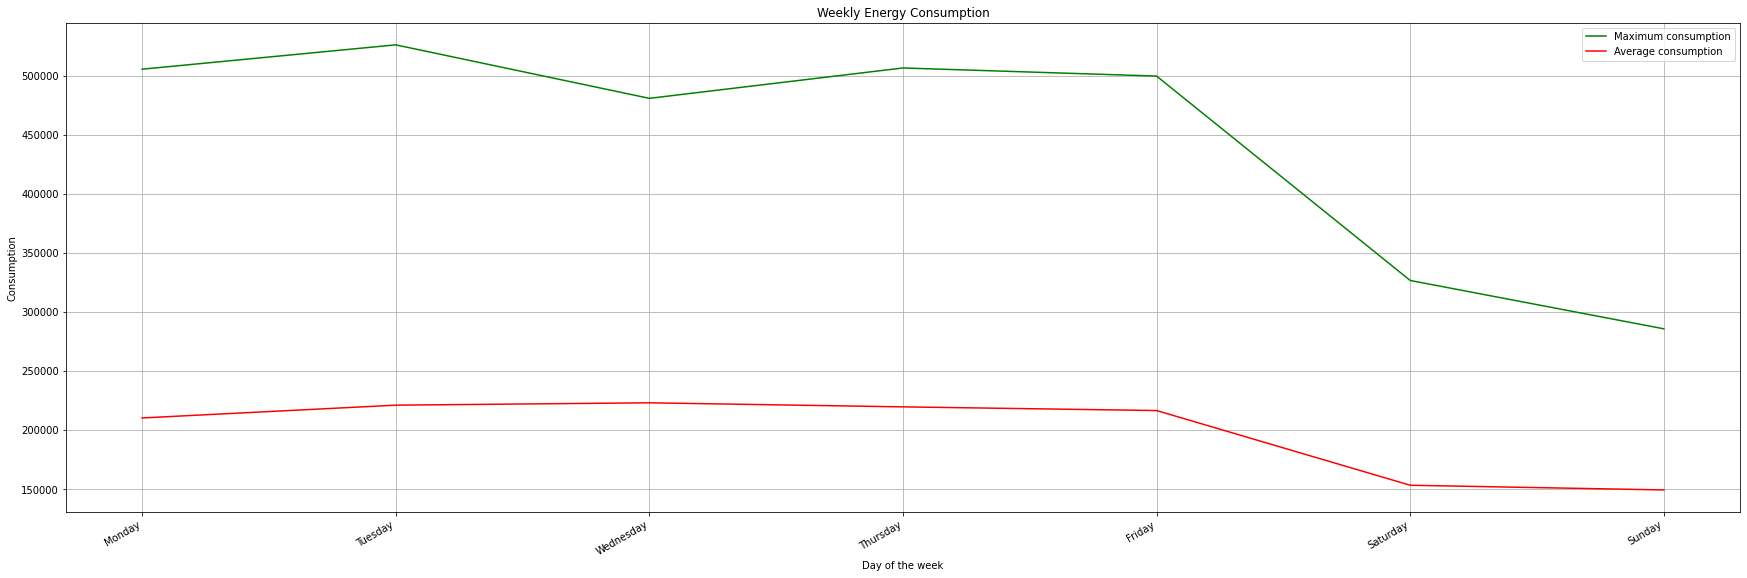

In [223]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    #ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

In [224]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend
395953,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,96.0,11.3,1
395954,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,96.0,11.3,1
395955,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,96.0,11.3,1
395956,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,96.0,11.3,1
395957,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,96.0,11.3,0


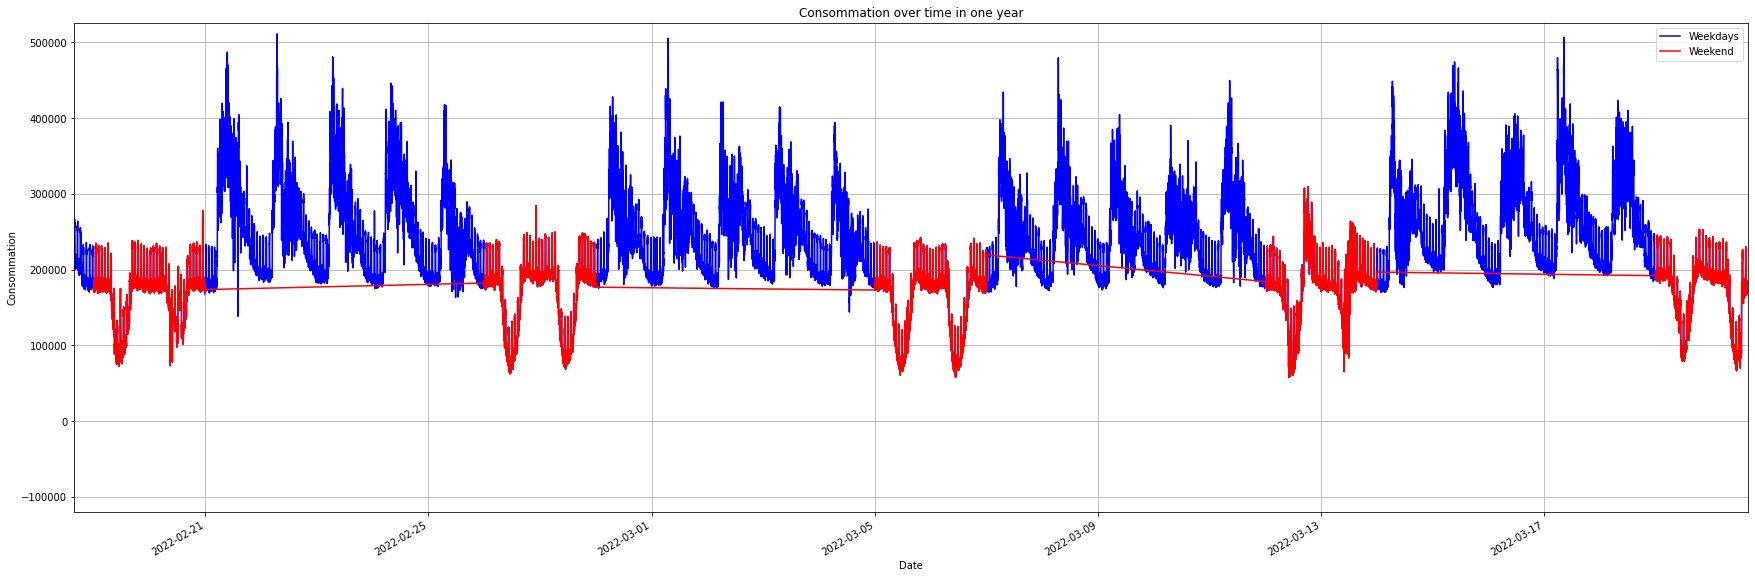

In [225]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

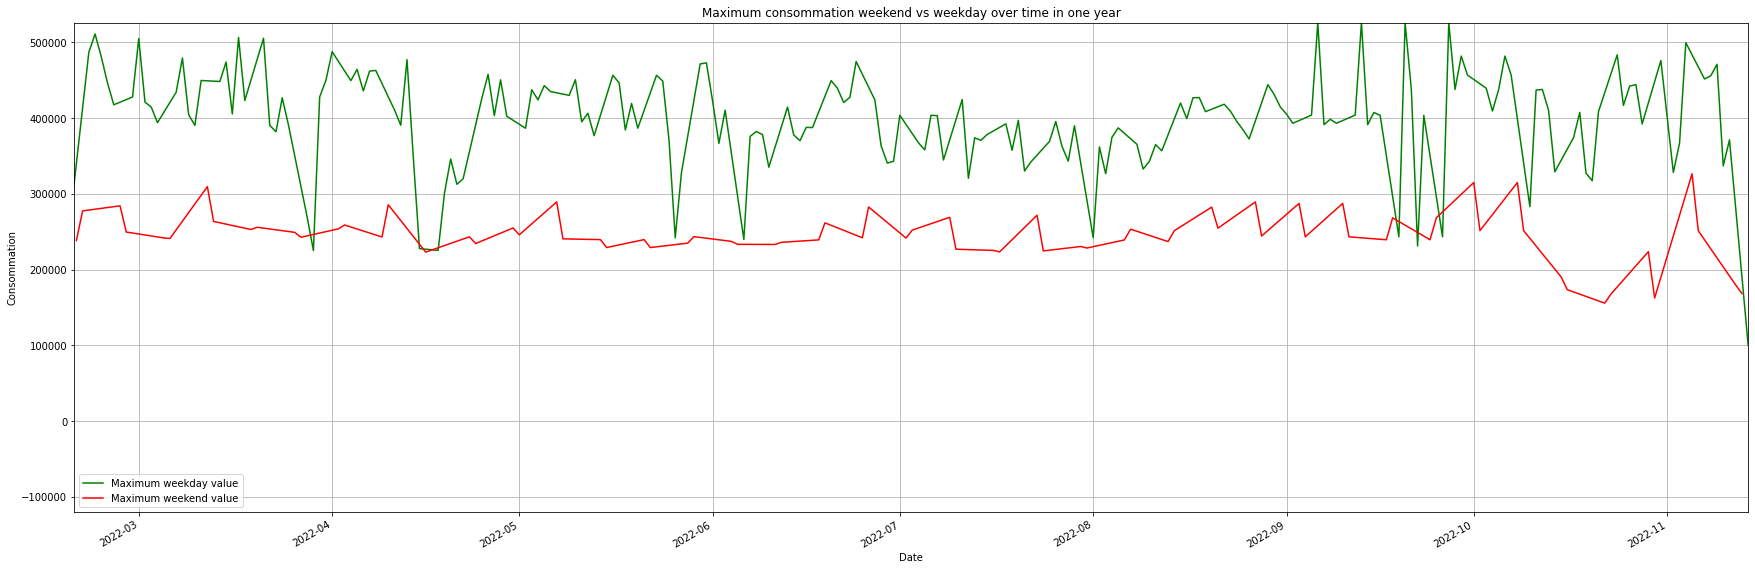

In [226]:
def plot_consommation_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation weekend vs weekday over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_weekend_vs_weekday()

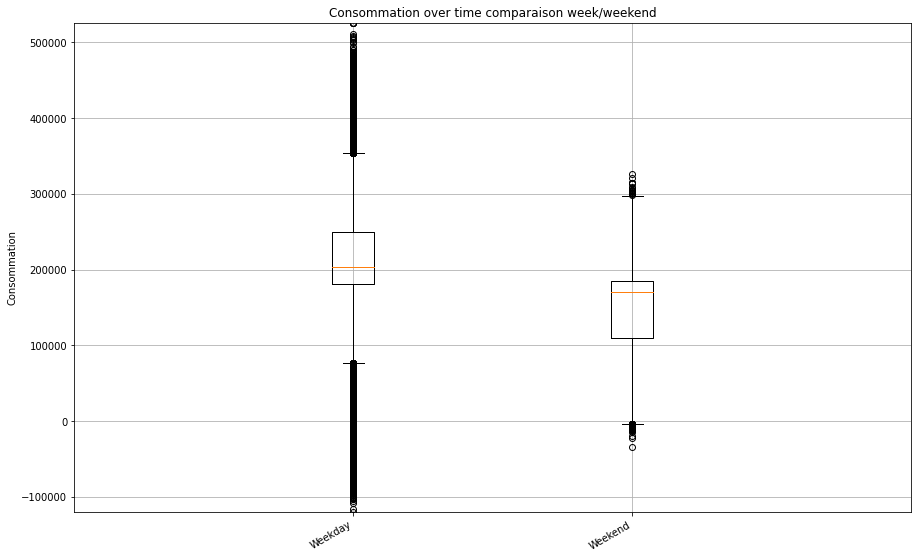

In [227]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

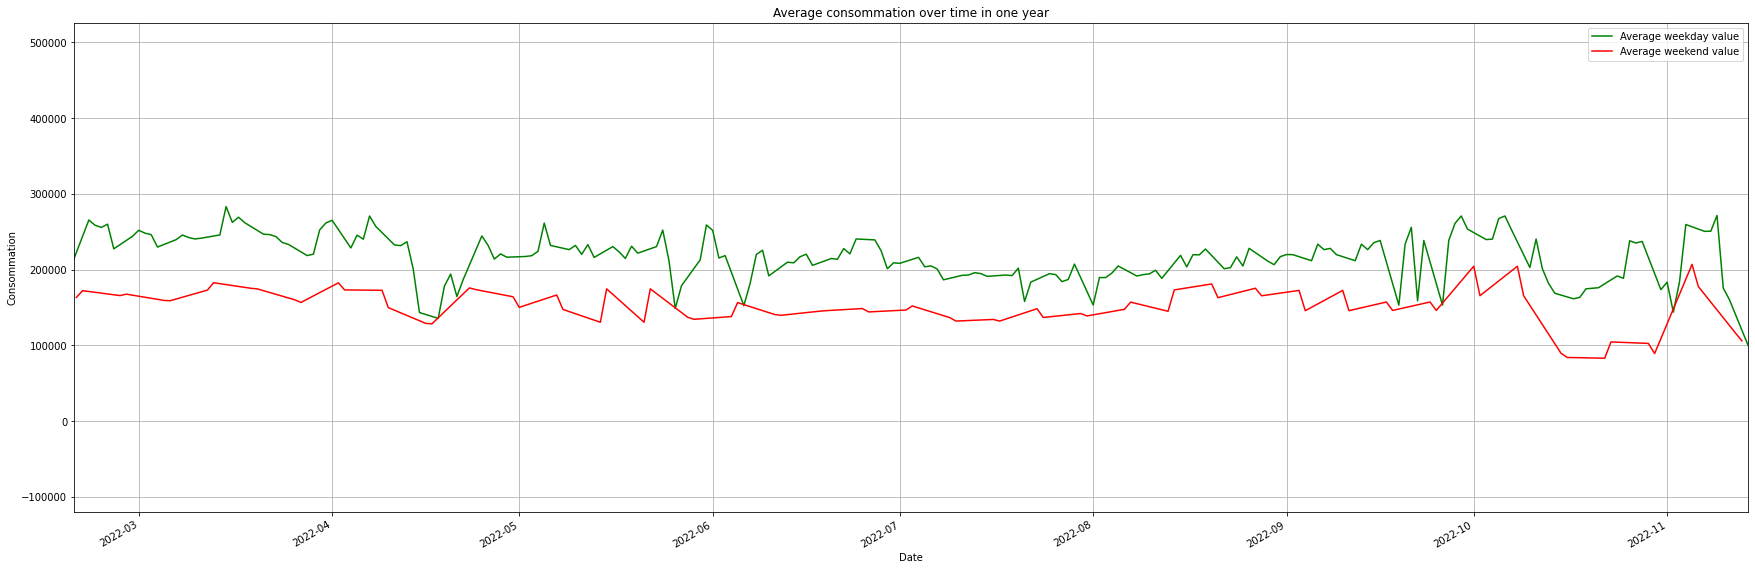

In [228]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

In [229]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()
df.sort_values(by='Date', inplace=True)

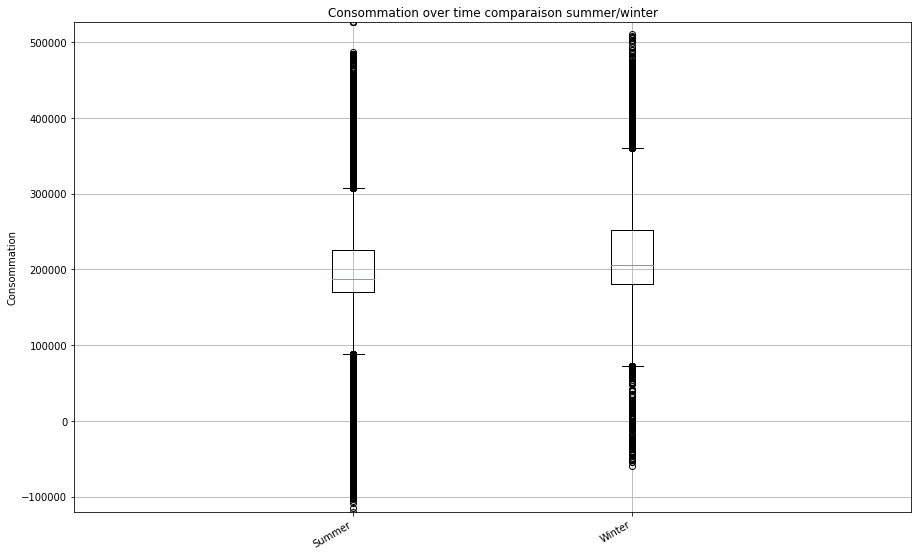

In [230]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

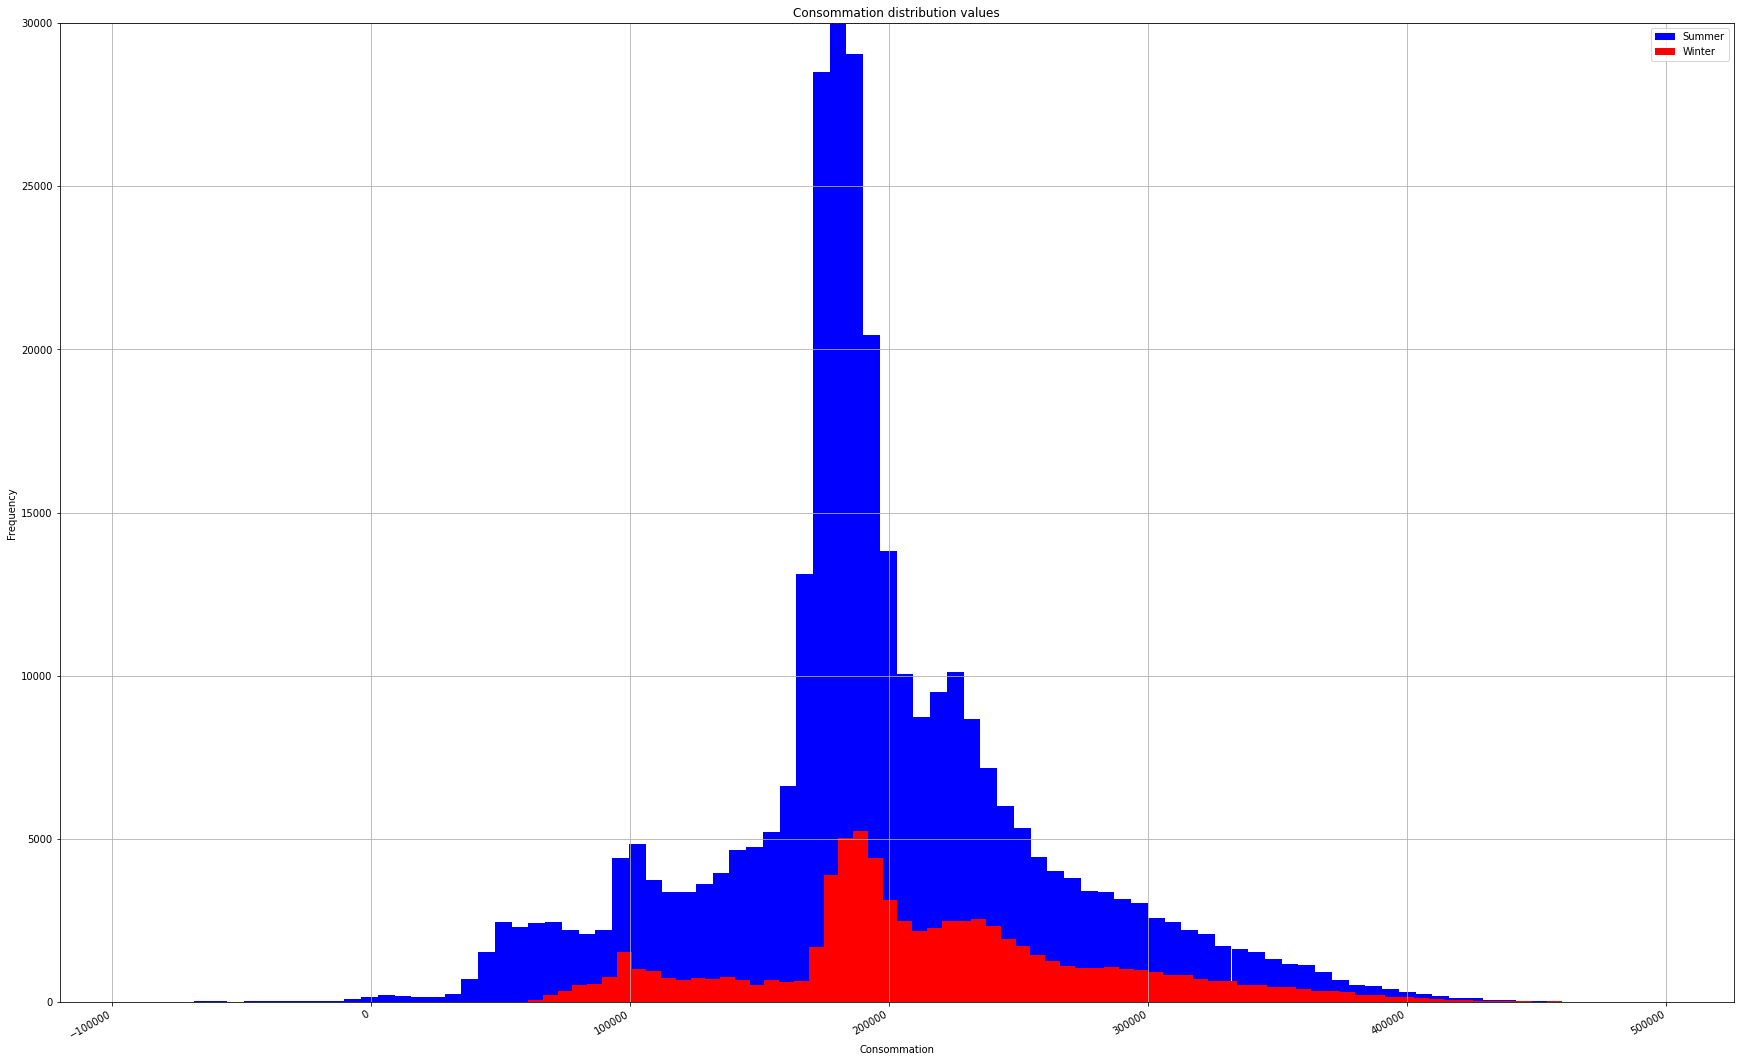

In [231]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours vs Transition morning vs Transition evening

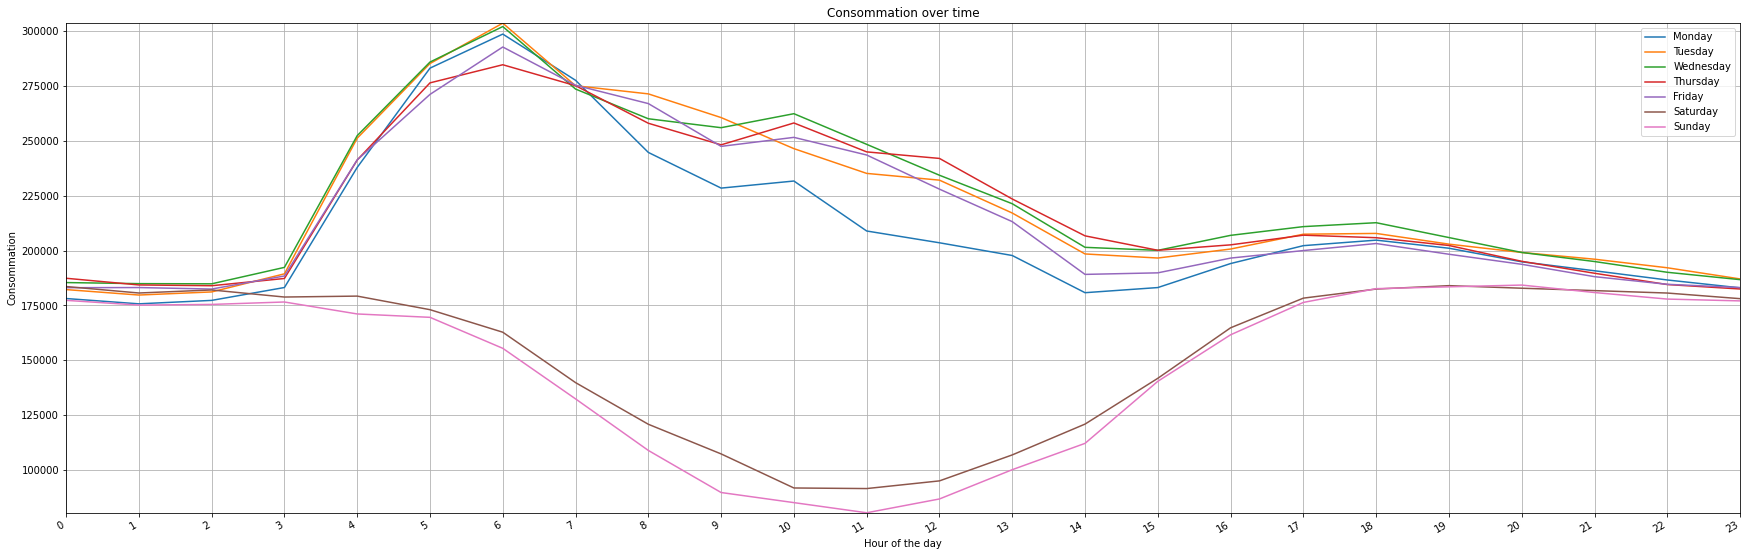

In [232]:

fig, ax = plt.subplots(figsize=(30, 10))

# I want to groupby the day of the week and the hour of the day
# I can't do it directly with the date column, so I create a new column
# with the day of the week and the hour of the day
df['Day of the week'] = df['Date'].dt.dayofweek
df['Hour of the day'] = df['Date'].dt.hour

# I groupby the day of the week and the hour of the day
# and I compute the mean of the value
df_grouped = df.groupby(['Day of the week', 'Hour of the day'])['Value'].mean()
df_grouped = df_grouped.reset_index()

# I plot the mean of the value for each day of the week
for day in range(7):
    ax.plot(df_grouped[df_grouped['Day of the week'] == day]['Hour of the day'], df_grouped[df_grouped['Day of the week'] == day]['Value'], label=day)

ax.set_title('Consommation over time')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Consommation')
ax.set_xlim(df_grouped['Hour of the day'].min(), df_grouped['Hour of the day'].max())
ax.set_ylim(df_grouped['Value'].min(), df_grouped['Value'].max())
#I want a more detailed x axis
ax.set_xticks(range(24))

ax.grid(True)
# for the legend, I want to display the day of the week
# I use the calendar module to get the day of the week
import calendar
ax.legend([calendar.day_name[day] for day in range(7)])
fig.autofmt_xdate()

plt.show()




In [233]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 15)).astype(int)
df['Transition morning'] = ((df['Date'].dt.hour >= 3) & (df['Date'].dt.hour < 6)).astype(int)
df['Transition evening'] = ((df['Date'].dt.hour >= 15) & (df['Date'].dt.hour < 19)).astype(int)

# Make a column that can take 4 values, 0 if the hour is between 3 and 6, 1 if the hour is between 6 and 15, 2 if the hour is between 15 and 19, 3 otherwise
df['Type of hour'] = df['Date'].dt.hour.apply(lambda x: 0 if (x >= 3) & (x < 6) else 1 if (x >= 6) & (x < 15) else 2 if (x >= 15) & (x < 19) else 3)

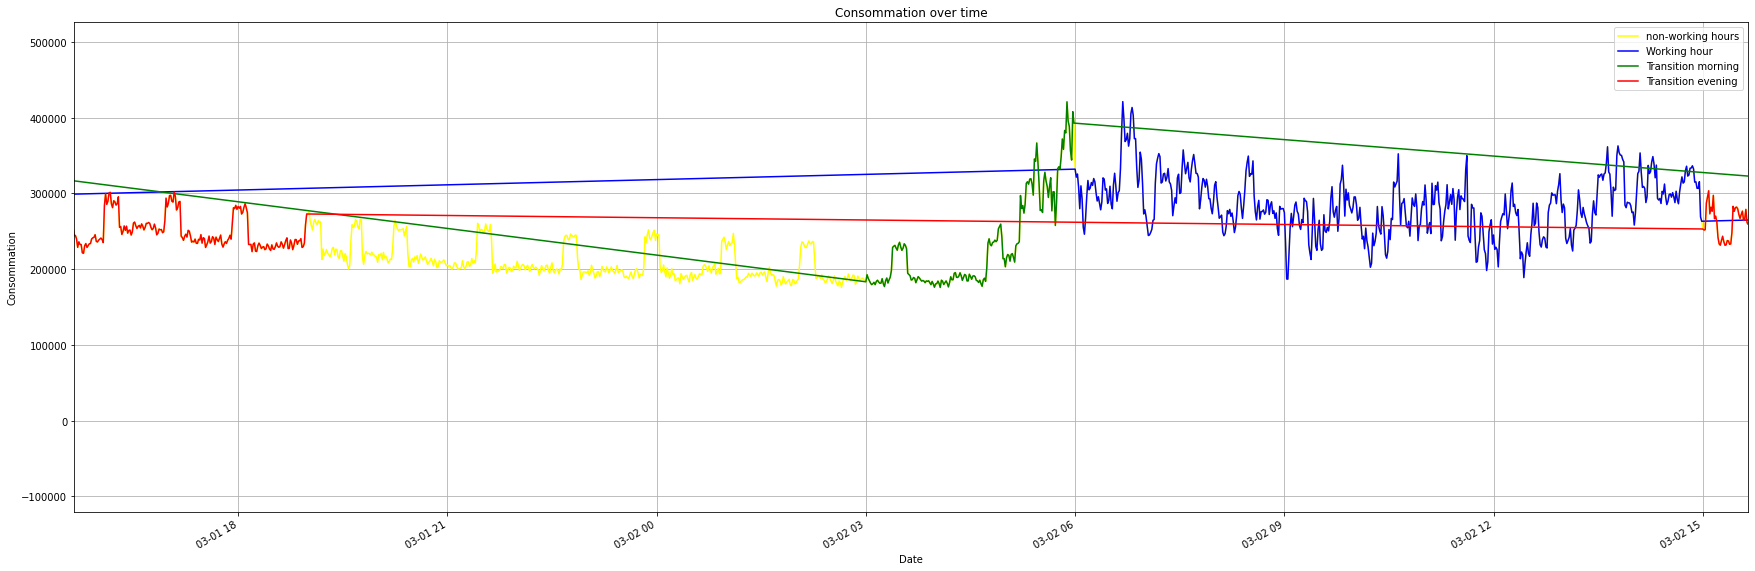

In [234]:
# plot the consommation over time
def plot_day(x):
    fig, ax = plt.subplots(figsize=(30, 10))
    #use a different color for the working hour, transition morning and transition evening
    ax.plot(df['Date'], df['Value'], color='yellow', label='non-working hours')
    ax.plot(df[df['Working hour'] == 1]['Date'], df[df['Working hour'] == 1]['Value'], color='blue', label='Working hour')
    ax.plot(df[df['Transition morning'] == 1]['Date'], df[df['Transition morning'] == 1]['Value'], color='green', label='Transition morning')
    ax.plot(df[df['Transition evening'] == 1]['Date'], df[df['Transition evening'] == 1]['Value'], color='red', label='Transition evening')
    

    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    # I want to choose the day to be plotted

    ax.set_xlim(df['Date'].min() + pd.DateOffset(days=x), df['Date'].min()+ pd.DateOffset(days=x+1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_day(11)


## Holiday Feature

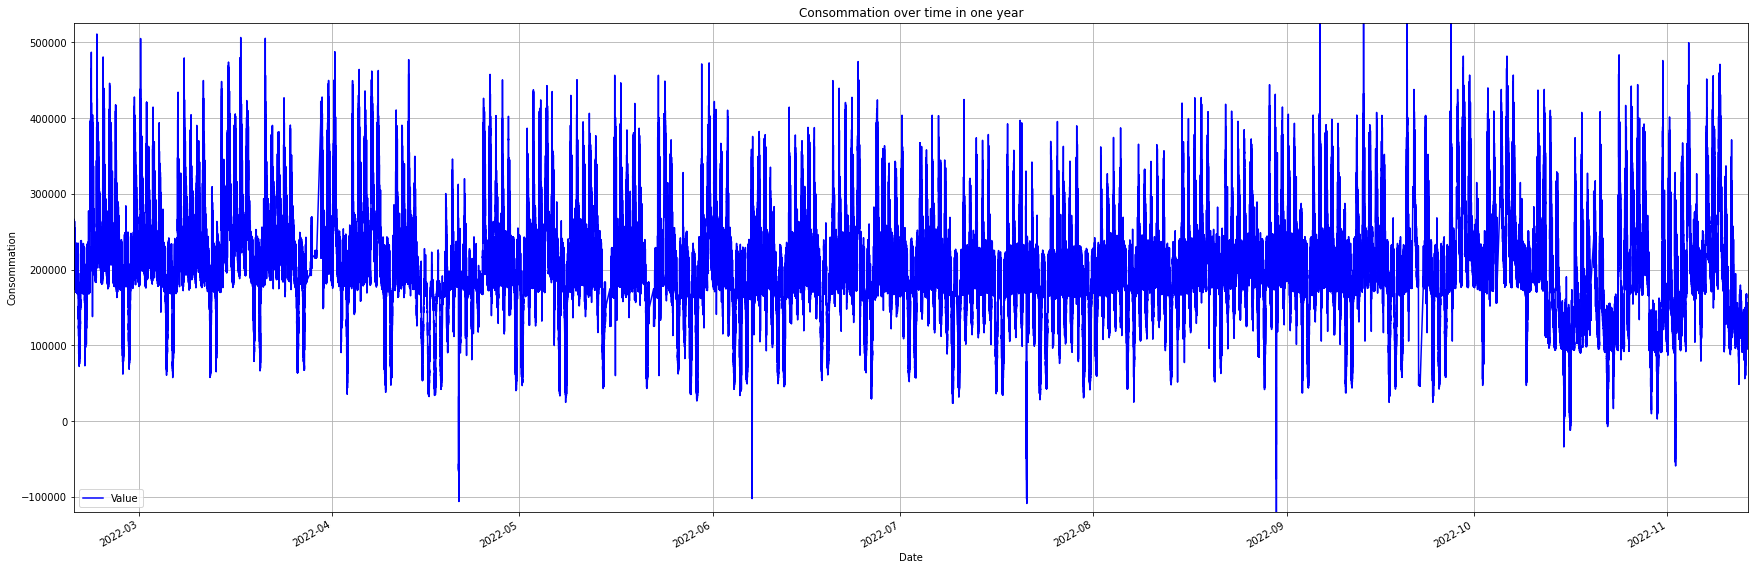

In [235]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [236]:
#add a column holiday 1 between 2022-04-20 and 2022-04-28  and specific date 1/08/2022  0 otherwise
df['Holiday'] = (((df['Date'] >= '2022-04-15') & (df['Date'] <= '2022-04-25')) | ((df['Date'] >= '2022-08-01') & (df['Date'] <= '2022-08-01')) | ((df['Date'] >= '2022-09-20') & (df['Date'] <= '2022-09-20')) | ((df['Date'] >= '2022-12-24') & (df['Date'] <= '2022-09-25')) ).astype(int)

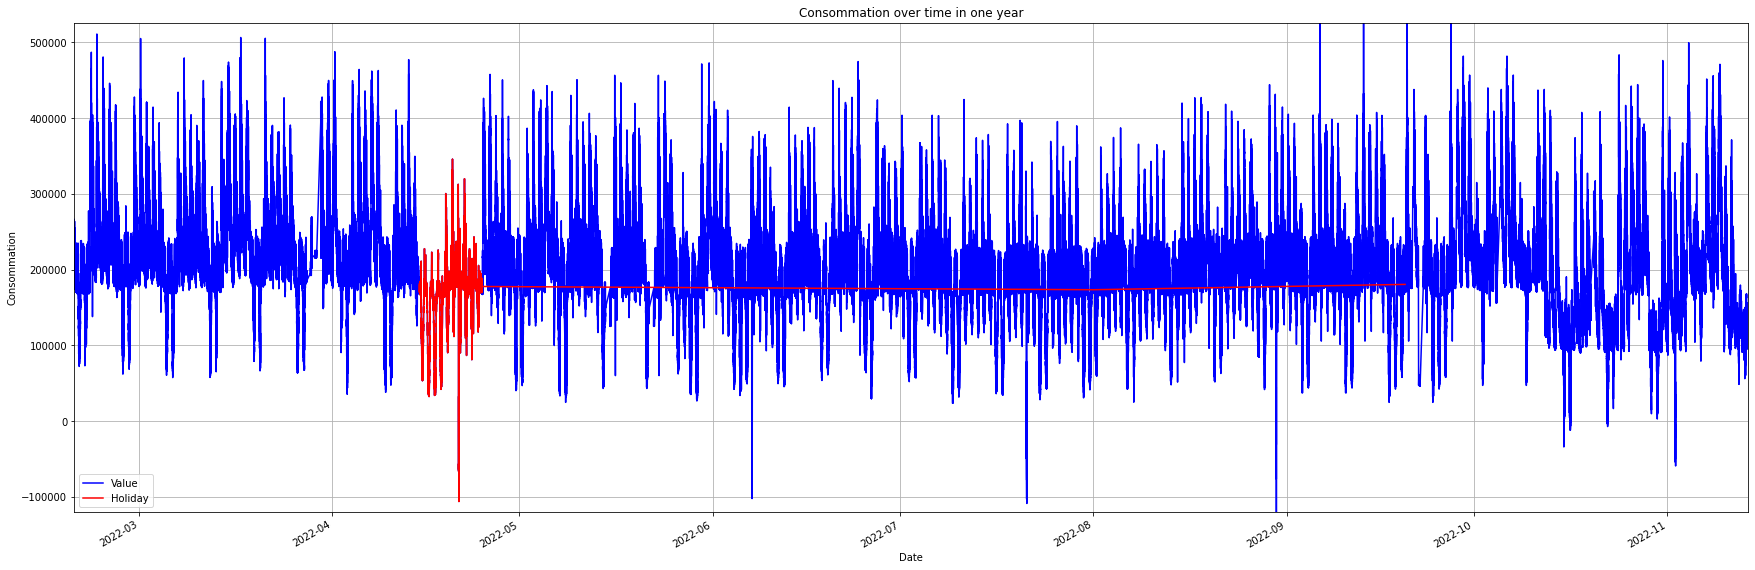

In [237]:
#plot value over time with holidays in anotehr color
def plot_consommation_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.plot(df[df['Holiday'] == 1]['Date'], df[df['Holiday'] == 1]['Value'], color='red', label= "Holiday")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_holiday()

## Normalized feature for Value

In [238]:
# add a column with the normalized value
df['Normalized'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

In [239]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend,Winter,Day of the week,Hour of the day,Working hour,Transition morning,Transition evening,Type of hour,Holiday,Normalized
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.514366
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.521853
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.526065
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.523435
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.525545


## Pattern


In [240]:
df['Peak']=0
#if normalized value is greater than 0.3 but smaller than 1, it is a peak but for non working hours
df.loc[(df['Normalized'] > 0.52) & (df['Normalized'] < 0.60) & (df['Working hour'] == 0) & (df['Transition evening'] == 0), 'Peak'] = 1

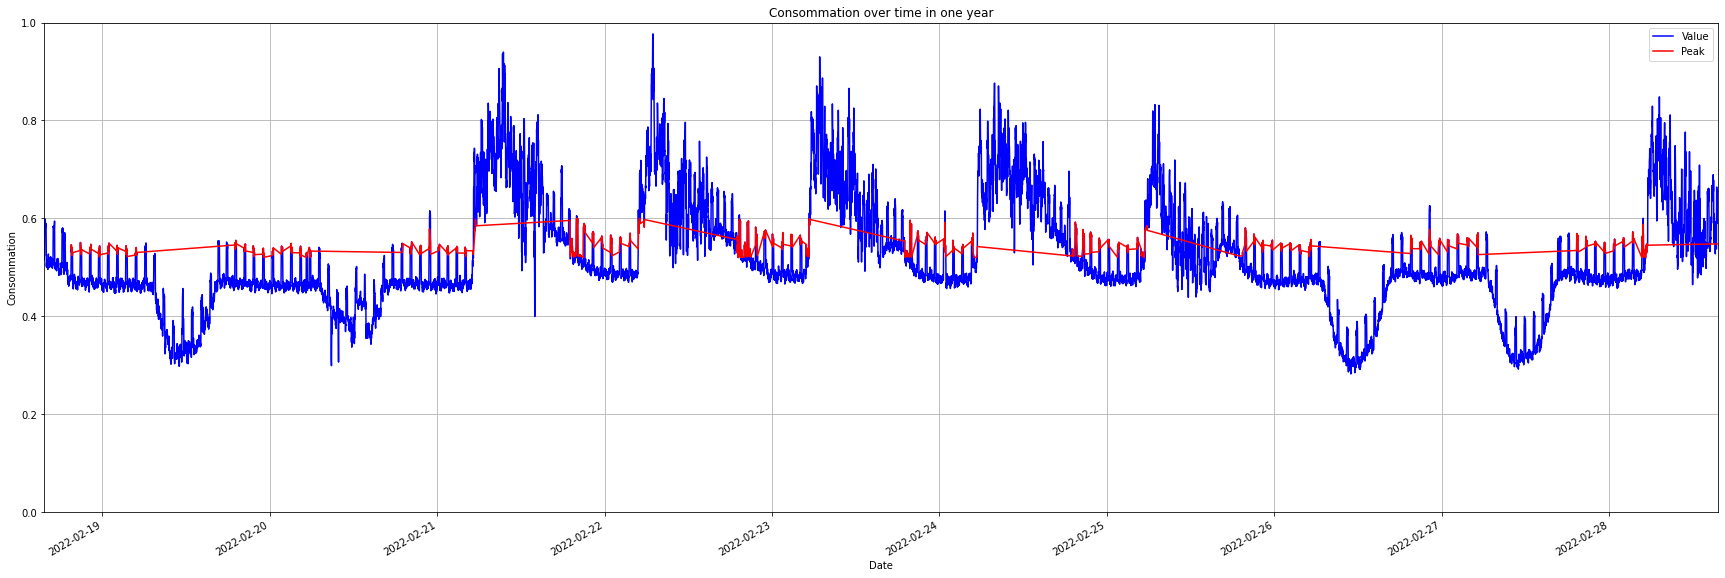

In [241]:
#plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Normalized'], color='blue', label= "Value")
    ax.plot(df[df['Peak'] == 1]['Date'], df[df['Peak'] == 1]['Normalized'], color='red', label= "Peak")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min()+ pd.Timedelta(days=10))
    ax.set_ylim(df['Normalized'].min(), df['Normalized'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_peak()


In [242]:
# drop columns working hour, transition morning and transition evening
df.drop(['Working hour', 'Transition morning', 'Transition evening'], axis=1, inplace=True)

## Generate Cycle for Dates

In [243]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [244]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, '+')
    ax.set_title(title)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.grid(True)
    plt.show()

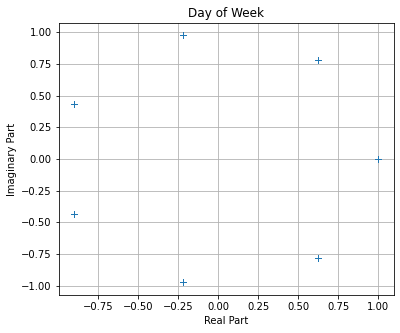

In [245]:
day_of_week_re, day_of_week_im = generate_cycle(df['Day_of_week'].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, 'Day of Week')

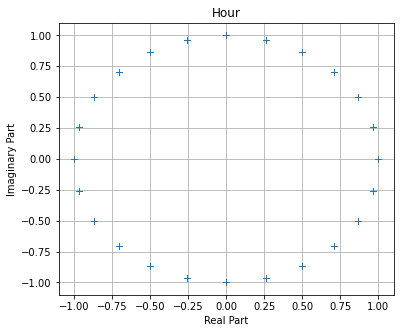

In [246]:
hour_re, hour_im = generate_cycle(df['Hour'].to_numpy(), 24)
plot_cycle(hour_re, hour_im, 'Hour')

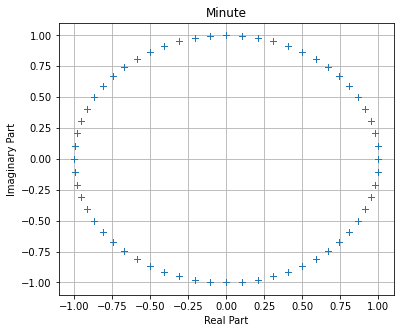

In [247]:
minute_re, minute_im = generate_cycle(df['Minute'].to_numpy(), 60)
plot_cycle(minute_re, minute_im, 'Minute')

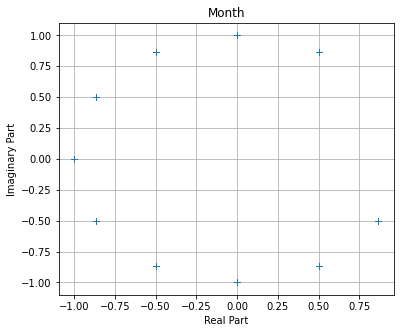

In [248]:
month_re, month_im = generate_cycle(df['Month'].to_numpy(), 12)
plot_cycle(month_re, month_im, 'Month')

In [249]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12] # Months with 31 days
    lst_30 = [4, 6, 9, 11] # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if (year[k]%4==0 and year[k]%100!=0 or year[k]%400==0):
                nb_div = 29
            else:
                nb_div = 29
        else: 
            print('Error in Months')
            break

        z = np.exp(days[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

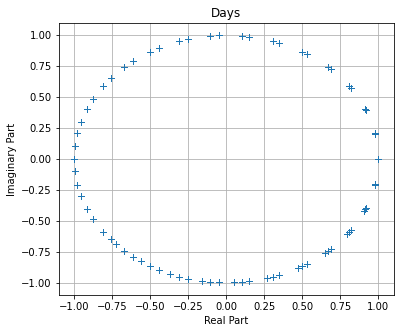

In [250]:
days_re, days_im = generate_cycle_days(df['Day'].to_numpy(), df['Month'].to_numpy(), df['Year'].to_numpy())
plot_cycle(days_re, days_im, 'Days')

In [251]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend,Winter,Day of the week,Hour of the day,Type of hour,Holiday,Normalized,Peak
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8,0,1,4,15,2,0,0.514366,0
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8,0,1,4,15,2,0,0.521853,0
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8,0,1,4,15,2,0,0.526065,0
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8,0,1,4,15,2,0,0.523435,0
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8,0,1,4,15,2,0,0.525545,0


In [252]:
param = list(set(list(df.columns)) - set(['Second', 'Year']))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

#new_df['Day_of_week']= new_df['Day_of_week']/7


new_df.head()

,Day_of_week,Weekend,Month,Date,Day of the week,Value,Normalized,Hour of the day,Type of hour,Day,Winter,Holiday,Temperature,Minute,Peak,Irradiance,Hour,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,4,0,2,2022-02-18 15:39:00,4,212141.645,0.514366,15,2,18,1,0,12.8,39,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,4,0,2,2022-02-18 15:40:00,4,216980.618,0.521853,15,2,18,1,0,12.8,40,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,4,0,2,2022-02-18 15:41:00,4,219702.692,0.526065,15,2,18,1,0,12.8,41,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,4,0,2,2022-02-18 15:42:00,4,218002.962,0.523435,15,2,18,1,0,12.8,42,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,4,0,2,2022-02-18 15:43:00,4,219366.764,0.525545,15,2,18,1,0,12.8,43,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


In [253]:
#drop Hour of the day
new_df = new_df.drop(['Hour of the day'], axis=1)
new_df = new_df.drop(['Day_of_week'], axis=1)
new_df = new_df.drop(['Day of the week'], axis=1)

In [254]:
new_df.head()

,Weekend,Month,Date,Value,Normalized,Type of hour,Day,Winter,Holiday,Temperature,Minute,Peak,Irradiance,Hour,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,0,2,2022-02-18 15:39:00,212141.645,0.514366,2,18,1,0,12.8,39,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,0,2,2022-02-18 15:40:00,216980.618,0.521853,2,18,1,0,12.8,40,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,0,2,2022-02-18 15:41:00,219702.692,0.526065,2,18,1,0,12.8,41,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,0,2,2022-02-18 15:42:00,218002.962,0.523435,2,18,1,0,12.8,42,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,0,2,2022-02-18 15:43:00,219366.764,0.525545,2,18,1,0,12.8,43,0,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


## Windowing

In [ ]:
# new_df['Yesterday'] = np.nan
# new_df["Last_6hours"] = np.nan
# new_df["Last_12hours"] = np.nan
# new_df["Last_week"] = np.nan

In [ ]:
# def get_data(row):
#     d = row['Date']
#     yesterday_norm = new_df["Normalized"].loc[new_df["Date"] == d - pd.Timedelta(days=1)]
#     h6_norm = new_df["Normalized"].loc[new_df["Date"] == d - pd.Timedelta(hours=6)]
#     h12_norm = new_df["Normalized"].loc[new_df["Date"] == d - pd.Timedelta(hours=12)]
#     week_norm = new_df["Normalized"].loc[new_df["Date"] == d - pd.Timedelta(days=7)]
#     row['Yesterday'] = yesterday_norm
#     row['Last_6hours'] = h6_norm
#     row['Last_12hours'] = h12_norm
#     row['Last_week'] = week_norm
#     return row

# new_df = new_df.apply(get_data, axis=1)


In [62]:
# Add a column with the value at the exact same time the day before
new_df['Yesterday'] = new_df['Normalized'].shift(24*60)
# Add a column with the value at the exact same time one week before
new_df['Last_week'] = new_df['Normalized'].shift(24*60*7)
# Add a column with the value at the exact same time 12 hours before
new_df['12_hours_before'] = new_df['Normalized'].shift(12*60)
# Add a column with the value at the exact same time 6 hours before
new_df['6_hours_before'] = new_df['Normalized'].shift(6*60)

In [64]:
#drop the first 24*60*7 rows
new_df = new_df.drop(new_df.index[0:24*60*7])

In [65]:
new_df.head()

,Date,Value,Winter,Normalized,Month,Minute,Temperature,Day,Hour,Holiday,Peak,Type of hour,Irradiance,Weekend,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im,Yesterday,Last_week,12_hours_before,6_hours_before
10080,2022-02-25 15:40:00,239622.699,1,0.556886,2,40,4.8,25,15,0,0,2,331.0,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,0.647386,-0.762162,0.656709,0.514366,0.470097,0.614126
10081,2022-02-25 15:41:00,256716.069,1,0.583334,2,41,4.8,25,15,0,0,2,331.0,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,0.647386,-0.762162,0.661901,0.521853,0.475095,0.589400
10082,2022-02-25 15:42:00,256233.300,1,0.582587,2,42,4.8,25,15,0,0,2,331.0,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,0.647386,-0.762162,0.639111,0.526065,0.471747,0.577067
10083,2022-02-25 15:43:00,252685.165,1,0.577097,2,43,4.8,25,15,0,0,2,331.0,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,0.647386,-0.762162,0.639108,0.523435,0.464088,0.619993
10084,2022-02-25 15:44:00,258747.603,1,0.586477,2,44,4.8,25,15,0,0,2,331.0,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.104528,-0.994522,0.5,0.866025,0.647386,-0.762162,0.647721,0.525545,0.467889,0.667354


In [66]:
# drop normalized column
new_df = new_df.drop(['Normalized'], axis=1)

## Normalization

In [67]:
new_df['Temperature']= (new_df['Temperature'] - new_df['Temperature'].min()) / (new_df['Temperature'].max() - new_df['Temperature'].min())
new_df['Irradiance']= (new_df['Irradiance'] - new_df['Irradiance'].min()) / (new_df['Irradiance'].max() - new_df['Irradiance'].min())

new_df['Hour']= (new_df['Hour'] - new_df['Hour'].min()) / (new_df['Hour'].max() - new_df['Hour'].min())
new_df['Month']= (new_df['Month'] - new_df['Month'].min()) / (new_df['Month'].max() - new_df['Month'].min())
new_df['Minute']= (new_df['Minute'] - new_df['Minute'].min()) / (new_df['Minute'].max() - new_df['Minute'].min())
new_df['Day']= (new_df['Day'] - new_df['Day'].min()) / (new_df['Day'].max() - new_df['Day'].min())
new_df['Type of hour']= (new_df['Type of hour'] - new_df['Type of hour'].min()) / (new_df['Type of hour'].max() - new_df['Type of hour'].min())

# Modeling with ANN

## Preparing the data for the model

In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [69]:
# crop new_df from the beginning to 2022-09-15 00:00:00 using column date
new_df = new_df[new_df['Date'] < '2022-09-15 00:00:00']


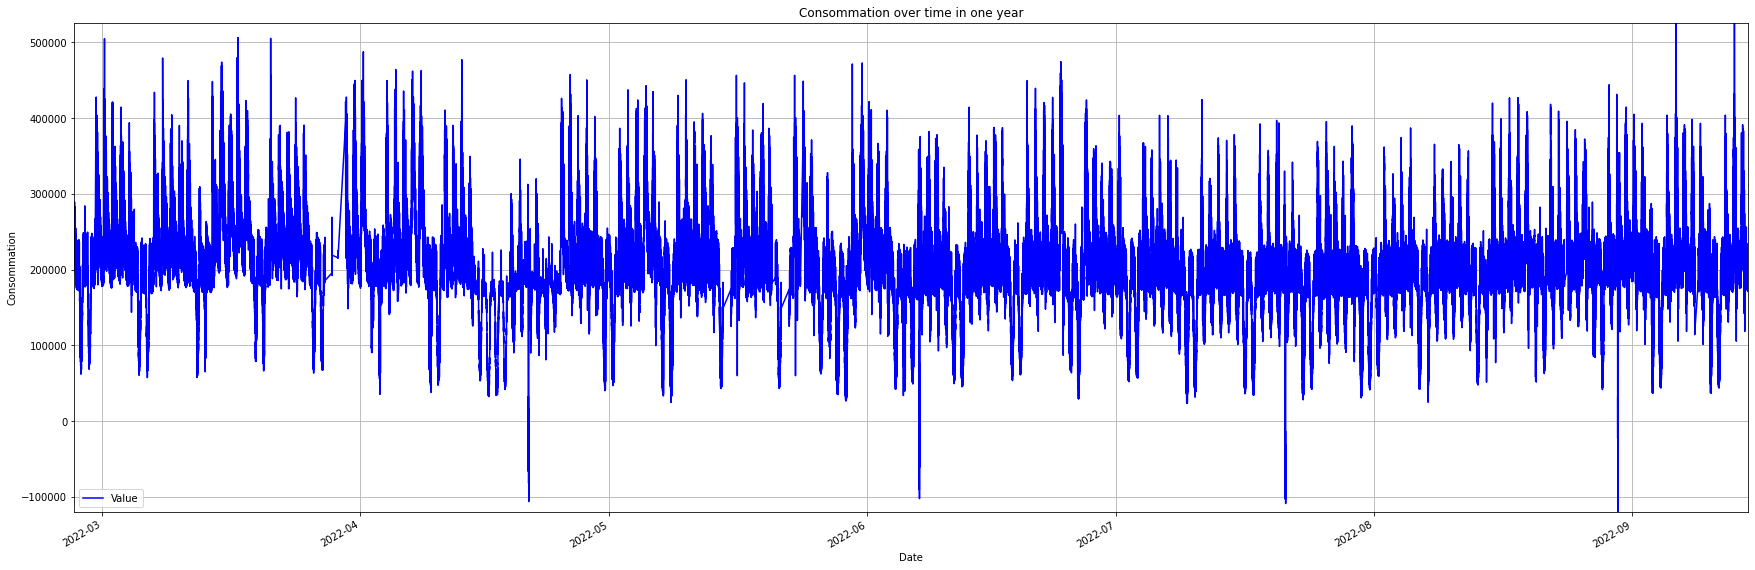

In [70]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(new_df['Date'], new_df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(new_df['Date'].min(), new_df['Date'].max())
    ax.set_ylim(new_df['Value'].min(), new_df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [71]:
target_column = ['Value']
predictors = list(set(list(new_df.columns)) - set(target_column))


X = new_df[predictors]
y = new_df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [72]:
#create new datafram X_train and X-test without column date
X_train_ = X_train.drop(['Date'], axis=1)
X_test_ = X_test.drop(['Date'], axis=1)

In [73]:
X_train_.head()

,Minute_im,Last_week,Minute_re,Day_im,Hour_re,Winter,Day_of_Week_re,Type of hour,Irradiance,Month_re,Month_im,6_hours_before,Yesterday,Hour,Hour_im,Day,Weekend,Day_re,12_hours_before,Temperature,Holiday,Minute,Month,Day_of_Week_im,Peak
10080,-0.866025,0.514366,-0.500000,-0.762162,-0.707107,1,-0.900969,0.666667,0.291373,0.5,0.866025,0.614126,0.656709,0.652174,-0.707107,0.8,0,0.647386,0.470097,0.244156,0,0.677966,0.0,-0.433884,0
10081,-0.913545,0.521853,-0.406737,-0.762162,-0.707107,1,-0.900969,0.666667,0.291373,0.5,0.866025,0.589400,0.661901,0.652174,-0.707107,0.8,0,0.647386,0.475095,0.244156,0,0.694915,0.0,-0.433884,0
10082,-0.951057,0.526065,-0.309017,-0.762162,-0.707107,1,-0.900969,0.666667,0.291373,0.5,0.866025,0.577067,0.639111,0.652174,-0.707107,0.8,0,0.647386,0.471747,0.244156,0,0.711864,0.0,-0.433884,0
10083,-0.978148,0.523435,-0.207912,-0.762162,-0.707107,1,-0.900969,0.666667,0.291373,0.5,0.866025,0.619993,0.639108,0.652174,-0.707107,0.8,0,0.647386,0.464088,0.244156,0,0.728814,0.0,-0.433884,0
10084,-0.994522,0.525545,-0.104528,-0.762162,-0.707107,1,-0.900969,0.666667,0.291373,0.5,0.866025,0.667354,0.647721,0.652174,-0.707107,0.8,0,0.647386,0.467889,0.244156,0,0.745763,0.0,-0.433884,0


## Stochastic Gradient Descent

In [ ]:
# do gradient descent model 
from sklearn.linear_model import SGDRegressor

# Create the model
sgd = SGDRegressor(max_iter=5500, learning_rate='constant', tol=1e-3, eta0=0.005)

# Fit the model
sgd.fit(X_train_, y_train)

In [ ]:
sgdpredictions = sgd.predict(X_test_)
y_test_sgd= y_test
y_pred_sgd= sgdpredictions

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_sgd['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_sgd.head()
#add a column with the value predicted Y_pred_ to y_test_
y_test_sgd['Value_pred'] = y_pred_sgd
y_test_sgd.head()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mse = mean_squared_error(y_test_sgd.Value, y_test_sgd.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mape = mape*100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_sgd.Value, y_test_sgd.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

In [ ]:
# grid search for sgd tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_iter': [5000, 5500, 5600],
    #'eta0': [0.005, 0.006, 0.007]
    #'tol': [1e-3, 1e-4, 1e-5]
    'alpha': [0.0001, 0.00001, 0.000001]
}

In [ ]:
# Create a based model
sgd = SGDRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_, y_train)

grid_search.best_params_

## Ridge Regression

In [74]:
#build a model using ridge regression
from sklearn.linear_model import Ridge



In [75]:
ridge = Ridge(alpha=550, normalize=False)
ridge.fit(X_train_, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=550, normalize=False)

In [76]:
ridge_pred = ridge.predict(X_test_)

In [77]:
y_test_ridge =y_test
y_pred_ridge =ridge_pred

In [78]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_ridge['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_ridge.head()
#add a column with the value predicted Y_pred_ to y_test_
y_test_ridge['Value_pred'] = y_pred_ridge
y_test_ridge.head()

,Value,Date,Value_pred
220997,187969.688,2022-07-13 10:31:00,182075.692641
220998,207568.757,2022-07-13 10:32:00,186823.827466
220999,170588.327,2022-07-13 10:33:00,183009.703743
221000,171134.102,2022-07-13 10:34:00,187853.901406
221001,154144.495,2022-07-13 10:35:00,189695.928360


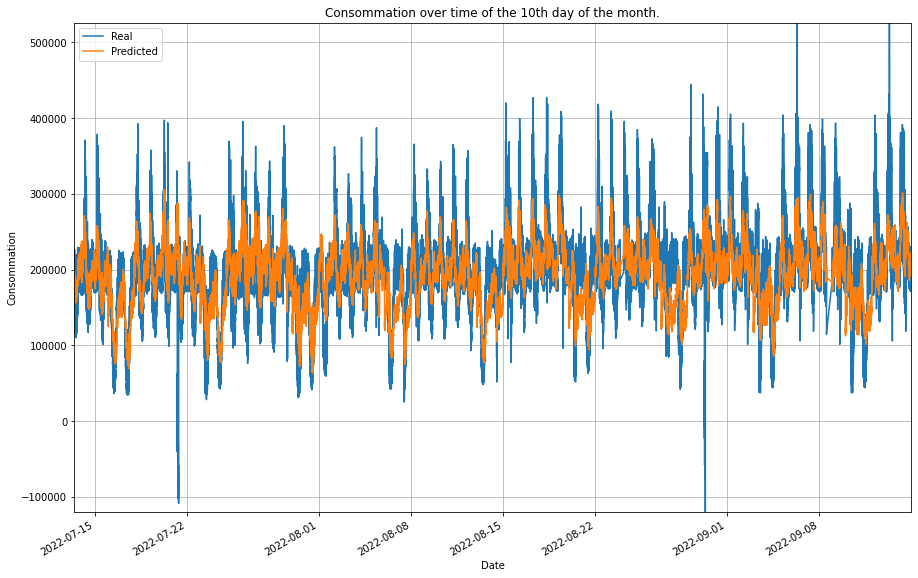

In [79]:
#plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_ridge['Date'], y_test_ridge['Value'], label='Real')
ax.plot(y_test_ridge['Date'], y_test_ridge['Value_pred'], label='Predicted')
ax.set_title("Consommation over time of the 10th day of the month.")
ax.set_xlabel('Date')
ax.set_ylabel('Consommation')
ax.set_xlim(y_test_ridge['Date'].min(), y_test_ridge['Date'].max())
ax.set_ylim(y_test_ridge['Value'].min(), y_test_ridge['Value'].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()

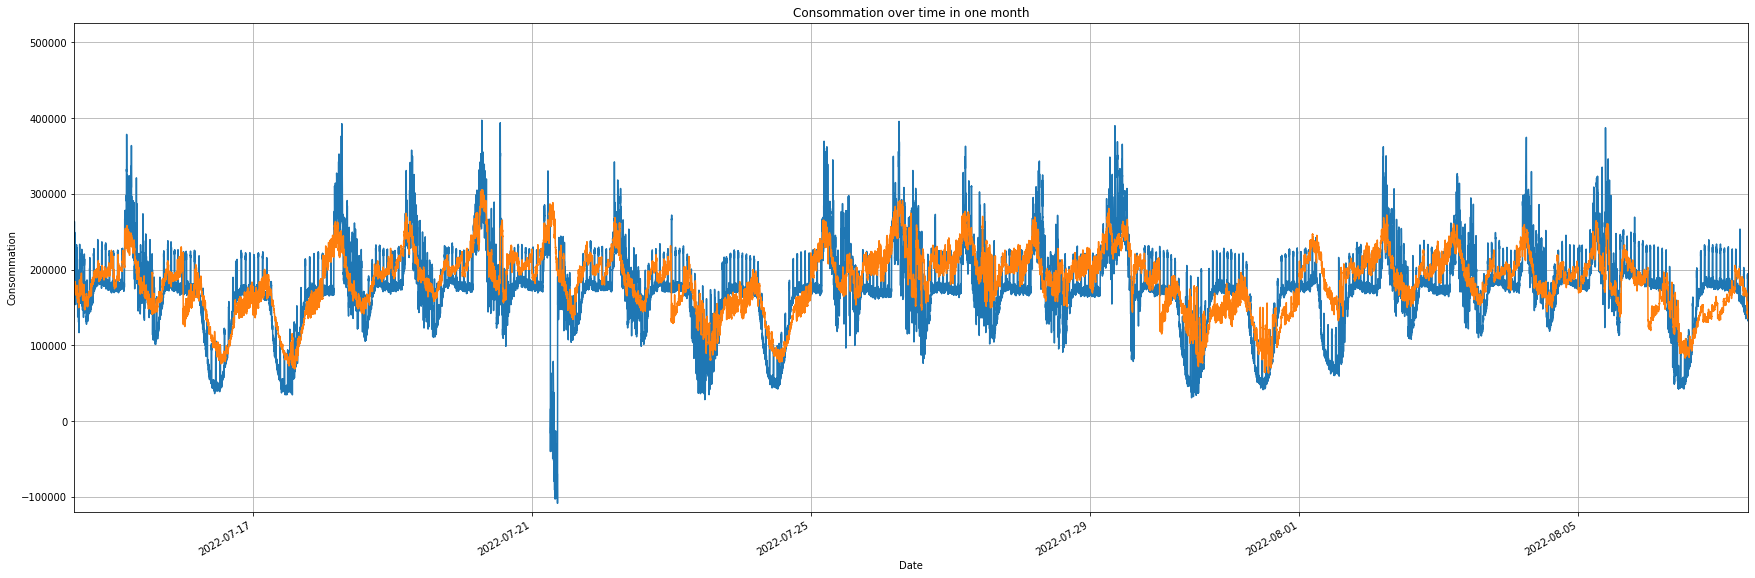

In [80]:
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    
    ax.plot(y_test_ridge['Date'], y_test_ridge['Value'], label='Real')
    ax.plot(y_test_ridge['Date'], y_test_ridge['Value_pred'], label='Predicted')
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    
    ax.set_xlim(y_test_ridge['Date'].min()+ pd.Timedelta(days=1) , y_test_ridge['Date'].min()+ pd.Timedelta(days=25))
    ax.set_ylim(y_test_ridge['Value'].min(), y_test_ridge['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mse = mean_squared_error(y_test_ridge.Value, y_test_ridge.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mape = mape*100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 31425.43
MSE: 1707366556.15
RMSE: 41320.29
MAPE: 23.9 %


In [82]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_ridge.Value, y_test_ridge.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 45.02 %


In [83]:
#do a grid search for the best parameters of ridge
from sklearn.model_selection import GridSearchCV



In [84]:
# Create the parameter grid based on the results of random search
param_grid = {
    'alpha': [450, 475, 500, 525, 550],
}

# Create a based model
ridge = Ridge()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ridge, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)




In [85]:
# Fit the grid search to the data   
grid_search.fit(X_train_, y_train)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [450, 475, 500, 525, 550]}, verbose=2)

In [86]:
grid_search.best_params_

{'alpha': 550}

## Support Vector Machine

In [87]:
# build a support vector machine model 
from sklearn.svm import SVR


In [89]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [90]:
svr.fit(X_train_, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_pred = svr.predict(X_test_)
y_test_svr =y_test
y_pred_svr =svr_pred

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_svr['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_svr.head()

#add a column with the value predicted Y_pred_ to y_test_
y_test_svr['Value_pred'] = y_pred_svr
y_test_svr.head()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_svr.Value, y_test_svr.Value_pred)
mse = mean_squared_error(y_test_svr.Value, y_test_svr.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_svr.Value, y_test_svr.Value_pred)
mape = mape*100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_svr.Value, y_test_svr.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

## Regularized Logistic Regression 

In [179]:
# do a model using logistic regression
from sklearn.linear_model import LogisticRegression


In [180]:
# logistic regression
logreg = LogisticRegression()
#change shape of y_train
y_train = y_train.values.ravel()
logreg.fit(X_train_, y_train)


ValueError: Unknown label type: 'continuous'

In [ ]:
logpred= logreg.predict(X_test_)
y_test_log =y_test
y_pred_log =logpred

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_log['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])

#add a column with the value predicted Y_pred_ to y_test_
y_test_log['Value_pred'] = y_pred_log
y_test_log.head()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_log.Value, y_test_log.Value_pred)
mse = mean_squared_error(y_test_log.Value, y_test_log.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_log.Value, y_test_log.Value_pred)
mape = mape*100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_log.Value, y_test_log.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

## Hypertuning the final model

In [819]:
#hypertune the parameters of the MLP regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error




In [820]:
# Create the parameter grid based on the results of random search
param_grid = {
    'hidden_layer_sizes': [(300, 300, 300), (200, 200, 200), (100, 100, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0001],
    'max_iter': [400, 500, 600]
}


In [821]:
# Create a based model
mlp = MLPRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)


In [822]:
# Fit the grid search to the data
# grid_search.fit(X_train_, y_train)

In [823]:
# Print the best parameters and lowest RMSE
# print("Best parameters found: ", grid_search.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))  



In [824]:
X_train_.head()

,Month_re,Minute_im,Winter,Peak,Weekend,Hour_im,Yesterday,Hour,12_hours_before,Minute_re,Day_of_Week_im,Day_re,Irradiance,Hour_re,Type of hour,Minute,Day,Holiday,Day_im,6_hours_before,Month,Temperature,Month_im,Last_week,Day_of_Week_re
10080,0.5,-0.866025,1,0,0,-0.707107,0.656709,0.652174,0.470097,-0.500000,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.677966,0.8,0,-0.762162,0.614126,0.0,0.244156,0.866025,0.514366,-0.900969
10081,0.5,-0.913545,1,0,0,-0.707107,0.661901,0.652174,0.475095,-0.406737,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.694915,0.8,0,-0.762162,0.589400,0.0,0.244156,0.866025,0.521853,-0.900969
10082,0.5,-0.951057,1,0,0,-0.707107,0.639111,0.652174,0.471747,-0.309017,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.711864,0.8,0,-0.762162,0.577067,0.0,0.244156,0.866025,0.526065,-0.900969
10083,0.5,-0.978148,1,0,0,-0.707107,0.639108,0.652174,0.464088,-0.207912,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.728814,0.8,0,-0.762162,0.619993,0.0,0.244156,0.866025,0.523435,-0.900969
10084,0.5,-0.994522,1,0,0,-0.707107,0.647721,0.652174,0.467889,-0.104528,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.745763,0.8,0,-0.762162,0.667354,0.0,0.244156,0.866025,0.525545,-0.900969


## Final model

In [73]:
reg_all = MLPRegressor(
    hidden_layer_sizes=(300, 300, 300),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate="constant",
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=500,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08
)
reg_all.fit(X_train_, y_train)

C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
y_pred = reg_all.predict(X_test_)

In [76]:
import joblib
joblib.dump(reg_all, 'model_reg_all_300_300_300_500_steps_good_peaks_1132min_wrong_windows_6hr_12hr_1day_1week.joblib')

['model_reg_all_300_300_300_300_300_500_steps_1132min_wrong_windows_6hr_12hr_1day_1week.joblib']

In [77]:
y_test_=y_test
y_pred_=y_pred

In [78]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_.head()
#add a column with the value predicted Y_pred_ to y_test_
y_test_['Value_pred'] = y_pred_
y_test_.head()

,Value,Date,Value_pred
220997,187969.688,2022-07-13 10:31:00,159073.152925
220998,207568.757,2022-07-13 10:32:00,157532.164785
220999,170588.327,2022-07-13 10:33:00,159244.990478
221000,171134.102,2022-07-13 10:34:00,159883.025499
221001,154144.495,2022-07-13 10:35:00,162874.928926


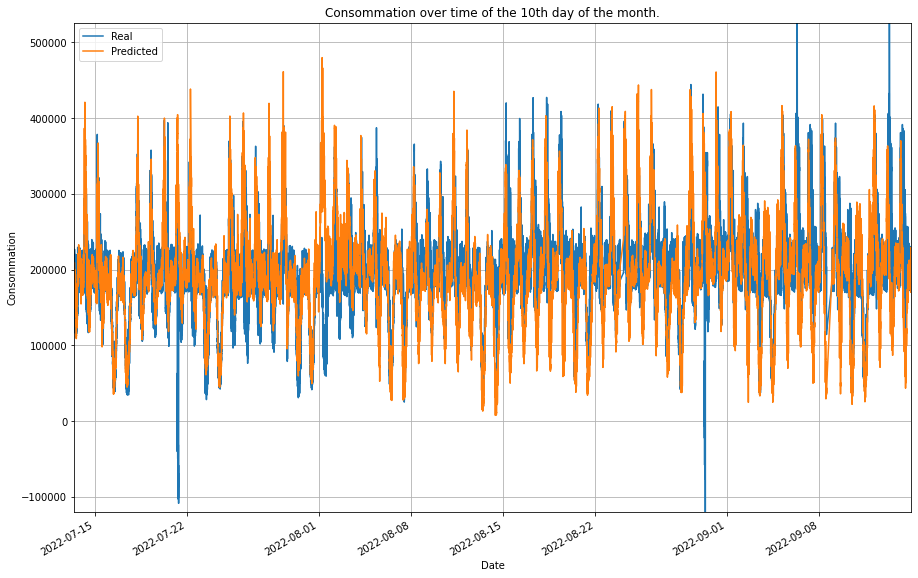

In [84]:
#plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
ax.set_title("Consommation over time of the 10th day of the month.")
ax.set_xlabel('Date')
ax.set_ylabel('Consommation')
ax.set_xlim(y_test_['Date'].min(), y_test_['Date'].max())
ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()

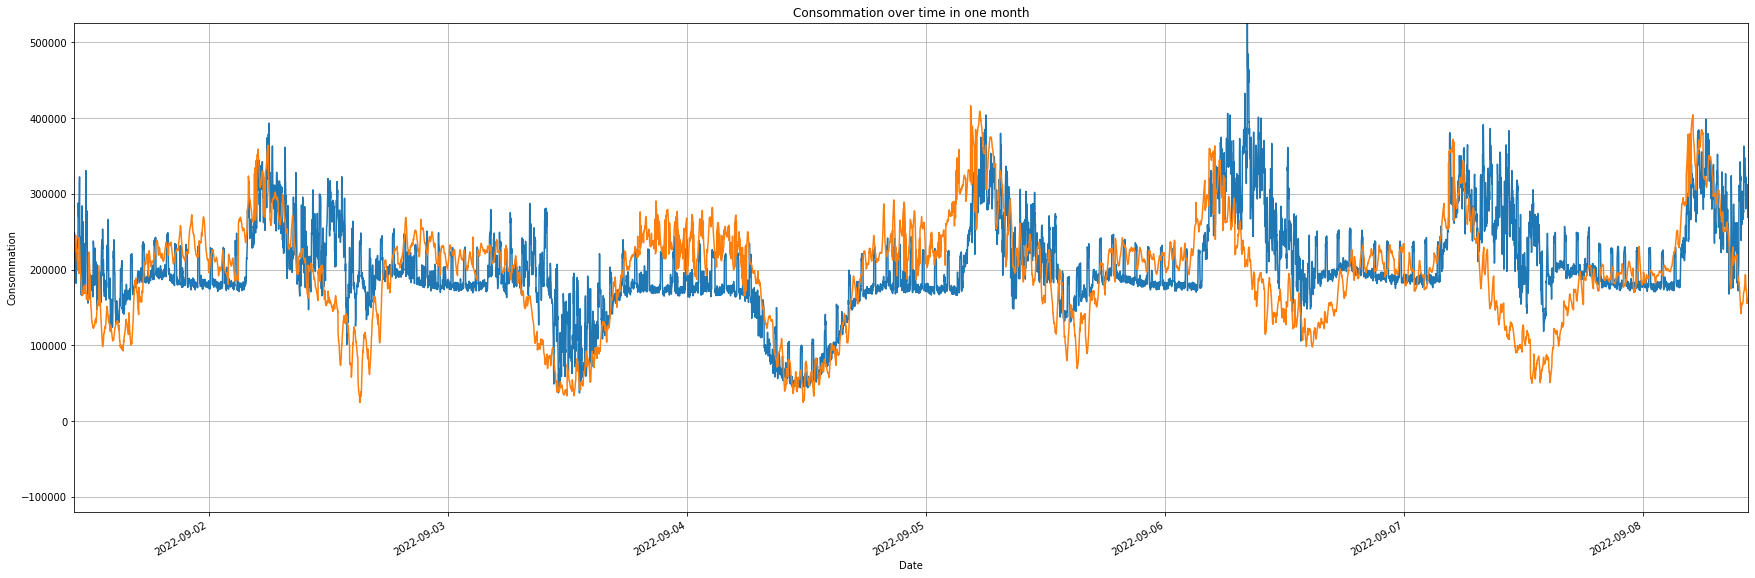

In [87]:
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    
    ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
    ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    
    ax.set_xlim(y_test_['Date'].min()+ pd.Timedelta(days=50) , y_test_['Date'].min()+ pd.Timedelta(days=57))
    ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
mape = mape*100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 38288.67
MSE: 3129065997.43
RMSE: 55938.06
MAPE: 27.37 %


In [82]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_.Value, y_test_.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: -0.76 %
